In [1]:
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

# OOP Predator Prey Agent Based Modelling in Python

Use what you have learned through this intermediate Python course to produce a *'predator-prey'* agent based modelling simulation. Your task is to program the classes which describe the eating and moving behaviour of a predator and its prey - we'll use rabbits and foxes in this example.

This exercise will test your knowledge of inheritance, and is specifically designed to demonstrate polymorphism in action. The main iterative algorithm and many functions are provided; your tasks is to generate the underlying classes.

|Class: Predator  |  Class: Prey   |
|-----------------------------|----------------------------|
|![The_Predator](data/fox.png)|![The_prey](data/rabbit.png)|

**Note: do not get confused between the current task and the "predator prey problem", which models the interactions between predator and prey through differential equations**

## Implementation

We'll assume the rabbits move only in a random direction, simulating a grazing behaviour, and that foxes move towards their nearest prey. Detailed breakdown of the algorithm is provided under [Task breakdown](#Task-Breakdown).

## What you have been given

Constants:

>* $N_r$ - number of rabbits
>* $N_f$ - number of foxes
>* $age_f$ - maximum "age" at which foxes die
>* $age_r$ - maximum "age" at which foxes die
>* $speed_f$ - fox move speed
>* $speed_r$ - rabbit move speed

You have been given the `Agent` class from which your Predator and Prey classes will inherit. This contains:

* `__init__(self, age, location, age_death` initialiser. Stores the attributes:
    - age: the age to give this Agent on construction (int)
    - location : array of (x, y)
    - age_death : age (iteration) at which this agent will 'die'
    - isalive : bool
   
* `update_ periodic_boundaries` - checks if self.location is within a box from 0,0 to 1,1, otherwise resets the location to appear on the other side of the box

* `move`, method - does nothing: **MUST BE REDEFINED IN DERIVED CLASSES**
 - *Note that this class inherits from the metaclass ABCMeta using the Python2 - Python3 cross compatibility `six` package.  This helps achieve polymorphism by enforcing us to redefine the move method in all derived classes (otherwise an error will be raised), ensuring the API remains complete and consistent*

* **All other functions should be self explanatory**

Some helper functions are also provided, which should be self explanatory and are already called for you in an iterative fashion. You do not need to know what these do.

## Task Breakdown

The classes you are required to implement are:

* **`Prey`** class inherited from `Agent` with the following attributes and methods:
    - class attributes: **Prey.age_death** and **Prey.speed**
    - `__init__` : has the same arguments as `Agent.__init__`, and simply calls the parent class `__init__` with
        >     super().__init__(age=age,
        >                                location=location,
        >                                age_death=Prey.age_death,
        >                                image='rabbit.png')
                                     
        - Try to understand this line : ask the demonstrators if you need help
        
    - A `move` method, to override the base `Agent` class
        - The algorithm should be (where each line can be calculated either simply or by a function in the base class):
        >   if [I am] alive
        >       vector = get random vector
        >       get distance (vector)
        >
        >       scale vector to unit length using distance
        >
        >       update location by (unit vector * Prey.speed)
        >
        >        update_periodic_boundaries 
        >
        >       increment_age
        >   else
        >       do nothing

* **`Predator`** class inhertied from `Agent` class with the following attributes and methods:
    - class attributes: **Predator.age_death** and **Predator.speed**

    - `__init__` : same args as Agent, but also includes preylist (the list of prey)
        - pass all arguments to parent `__init__` with super as you did in the Prey class, but with `image=fox.png`
        - add preylist as an attribute with `self`
        
    - `find_prey(self)` : to save time we provide the code for this method
       >     def find_prey(self):
       >         """Searches through the location of prey items in
       >         preylist and updates self.nearest prey"""
       >         max_distance = 10        # No prey this far away
       >         for prey in self.preylist:
       >             vec = self.get_vector(prey.location)
       >             distance = self.get_distance(vec)
       >             if distance < max_distance and prey.isalive:
       >                 max_distance = distance
       >                 self.nearest_prey = prey
       
     - A **`move`** method, to override the base `Agent` class abstract `move` method
        - The algorithm should be (where each line can be calculated either simply or by a function in the base class):
        
              if [I am] alive
                  find nearest prey

                  if nearest prey is alive:
                      get vector to nearest preys location
                      get distance (vector)

                     if distance is less than Predator.speed
                         kill the prey

                     else move:

                         scale vector to unit length

                         update location by (unit vector * Predator.speed)

                  else if prey is dead:
                     remove prey from preylist

                  increment_age

              else if [I am] dead
                  do nothing
   

In [2]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import image
import os
plt.rcParams['figure.figsize'] = (18.0, 10.0)
from abc import ABCMeta, abstractmethod
import six
%matplotlib inline


In [3]:
# Constants:
Nr = 15
Nf = 3
age_r = 200
age_f = 50
speed_r = 0.02
speed_f = 0.05

In [4]:
# Classes:
class Agent(six.with_metaclass(ABCMeta)):
    def __init__(self, age, location, age_death, image):
        """
        Parameters
        ----------
        age : int
        location : array length 2 of scalar
            (x, y) location
        age_death : age at which this instance dies
        image : string
            the name of the image
        """
        self._age = age    # We don't want anything else to overwrite age: 
                           # Could use encapsulation for self.age
        self.location = np.array(location)
        self.isalive = True
        self.age_death = age_death
        self.add_image(image)
    
    def increment_age(self):
        self._age += 1
        if self._age >= self.age_death:
            self.die()
    
    @abstractmethod
    def move(self):
        pass
    
    def die(self):
        self.isalive = False
        self.add_image('dead.png')
    
    def get_vector(self, loc):
        """Returns a tuple of distance and unit vector from self.location to input loc"""
        assert(len(loc) == 2), "Location should contain an x and y coordinate"
        vec = loc - self.location
        return vec
    
    def get_distance(self, vec):
        return np.linalg.norm(vec)

    def get_random_vector(self):
        """return a random vector"""
        return np.random.uniform(-1, 1, 2)

    def display(self, fig):
        """Displays an image of this instance depending on life status"""
        aximg = fig.add_axes([self.location[0], self.location[1], 0.05, 0.05])
        aximg.axis('off')
        aximg.imshow(self.image)
    
    def add_image(self, img, path='data'):
        """updates the image used by display method using imread"""
        self.image = image.imread(os.path.join(path, img))
    
    def update_periodic_boundaries(self):
        if self.location[0] > 1:
            self.location[0] -= 1
        elif self.location[0] < 0:
            self.location[0] += 1

        if self.location[1] > 1:
            self.location[1] -= 1
        elif self.location[1] < 0:
            self.location[1] += 1        


# Your classes should be implemented here ...
class Prey(Agent):
    age_death = age_r
    speed = speed_r     # How far the prey can move in one step
    
    def __init__(self, age=0, location=(0.,0.)):
        super().__init__(age=age, location=location, age_death=Prey.age_death, image='rabbit.png')

    def move(self):
        """Update the position of this instance if self.isalive is true using a prey
        type algorithm, i.e. random movement simulating grazing"""
        if self.isalive:
            move_vec = self.get_random_vector()
            distance = self.get_distance(move_vec)
            
            # scale by unit vector and scale by speed
            move_vec = move_vec / distance
            self.location += move_vec * Prey.speed
            
            # Set up periodic boundaries
            self.update_periodic_boundaries()
            
            # Finally increment the age
            self.increment_age()
        else:
            pass
        

class Predator(Agent):
    age_death = age_f
    speed = speed_f

    def __init__(self, age=0., location=(0.,0.), preylist=[]):
        super().__init__(age=age, location=location, age_death=Predator.age_death, image='fox.png')
        
        self.preylist = preylist

    def move(self):
        """Update the position of this instance if self.isalive is true using a predator
        type algorithm"""
        if self.isalive:
            self.find_prey()
            if self.nearest_prey.isalive:
                
                move_vec = self.get_vector(self.nearest_prey.location)
                distance = self.get_distance(move_vec)
                if distance < Predator.speed:
                    # Eat the prey
                    self.nearest_prey.die()
                else:
                    # Scale movement to unit vector and multiply by speed
                    self.location += move_vec / distance * Predator.speed
            else:
                try:
                    self.preylist.remove(self.nearest_prey)
                except ValueError:
                    print("Uh oh, no more prey left!")

            self.increment_age()
        else:
            pass
        
        
    def find_prey(self):
        """Searches through the location of prey items in preylist and
        updates this instance's nearest prey"""
        max_distance = 10          # No prey will be this far away
        for prey in self.preylist:
            vec = self.get_vector(prey.location)
            distance = self.get_distance(vec)
            if distance < max_distance and prey.isalive:
                max_distance = distance
                self.nearest_prey = prey

# =================================================================
# Misc helper functions
# =================================================================
def generate_predator_prey(Npredator, Nprey):
    """Generate Npredator predators and Nprey prey objects with randomly
    distribute locations and ages"""

    prey_locs = np.random.rand(Nr, 2)
    prey_ages = np.random.randint(0, Prey.age_death, Nr)
    preys = [Prey(age=prey_ages[i], location=prey_locs[i]) for i in range(Nr)]

    predator_locs = np.random.rand(Nf, 2)
    predator_ages = np.random.randint(0, Predator.age_death, Nf)
    predators = [Predator(age=predator_ages[i], location=predator_locs[i],
                          preylist=preys) for i in range(Nf)]
    return predators, preys


def update_predator_prey(predators, preys, fig):
    """Updates the locations of all predators and preys in the inputs and
    displays them in input fig using the Agent.display method"""
    # Clear the figure first
    fig.clf()     
    for predator in predators:
        predator.move()
        predator.display(fig)
        
    for prey in preys:
        prey.move()
        prey.display(fig)

## Test case
The code below should test if your classes work as expected

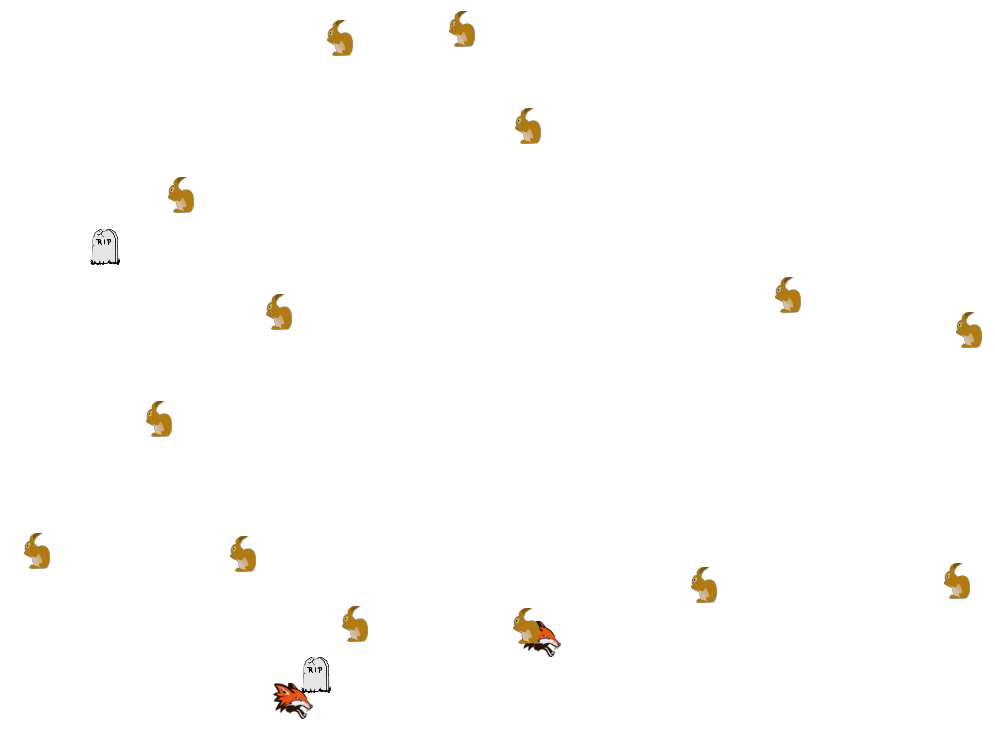

In [5]:

foxes, rabbits = generate_predator_prey(Nr, Nf)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.axis('off')

Nit = 1    # Iterate 1 more than the death of all foxes
outputpath = os.path.abspath('frames')

for i in range(Nit):
    update_predator_prey(foxes, rabbits, fig)



## Plotting
Here is the code to animate your simulation using the [JSAnimation package](https://github.com/jakevdp/JSAnimation)** (you will need to install this first)

Uh oh, no more prey left!
Uh oh, no more prey left!
Uh oh, no more prey left!



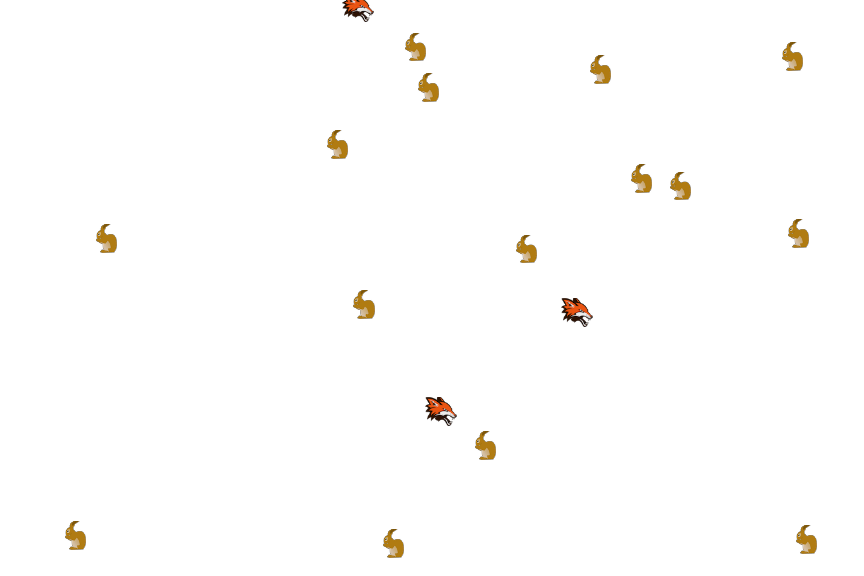
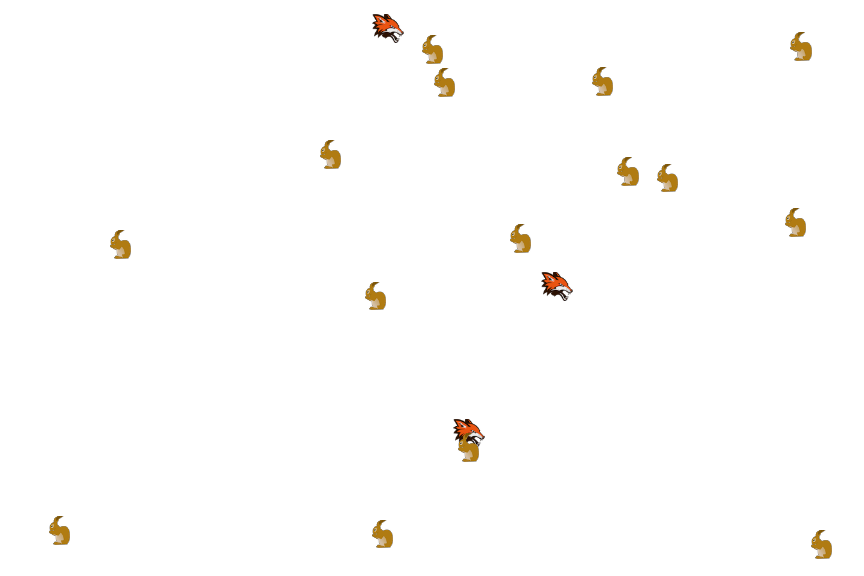
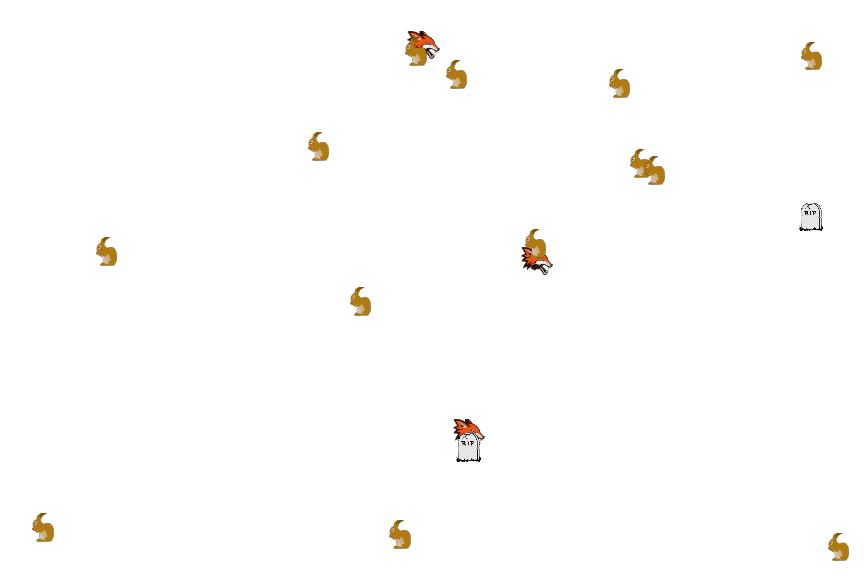
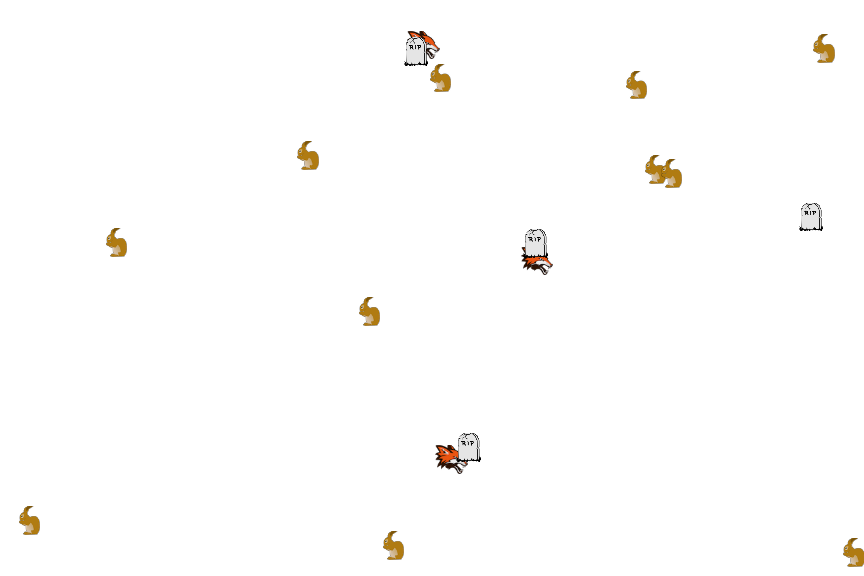
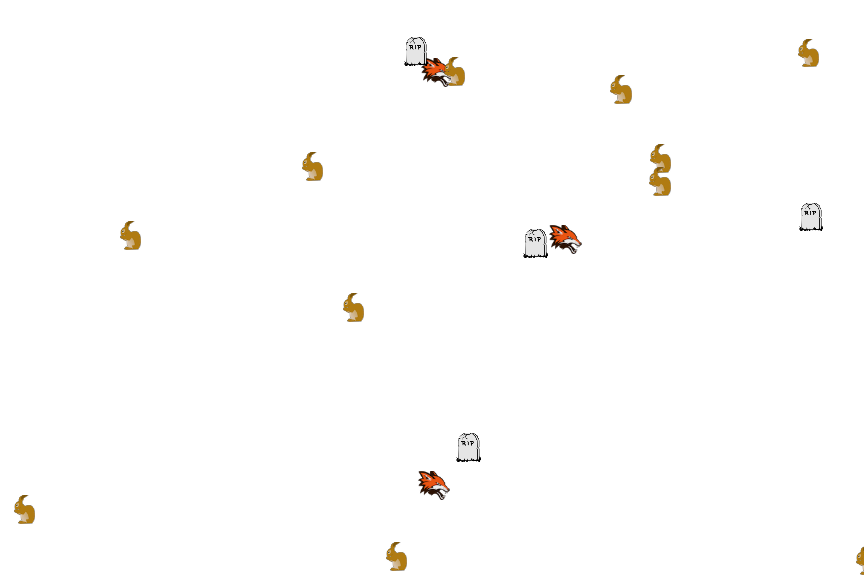
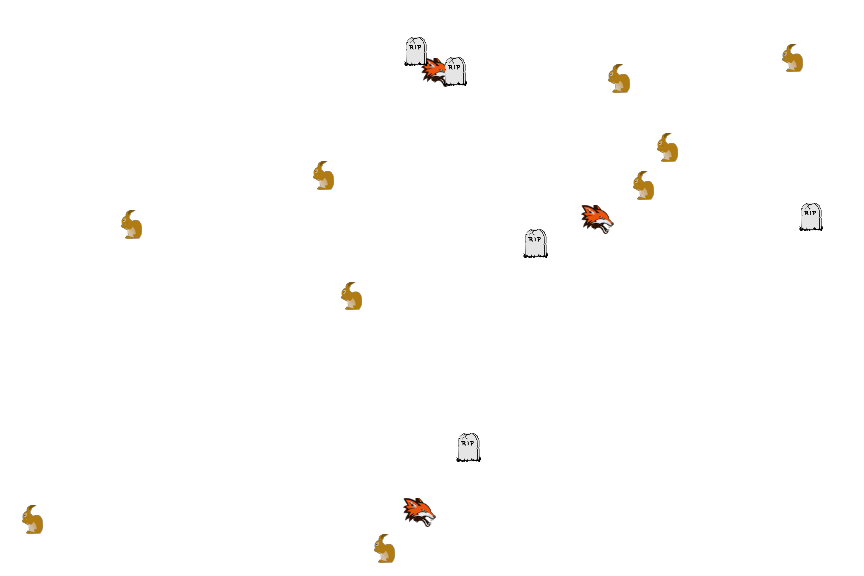
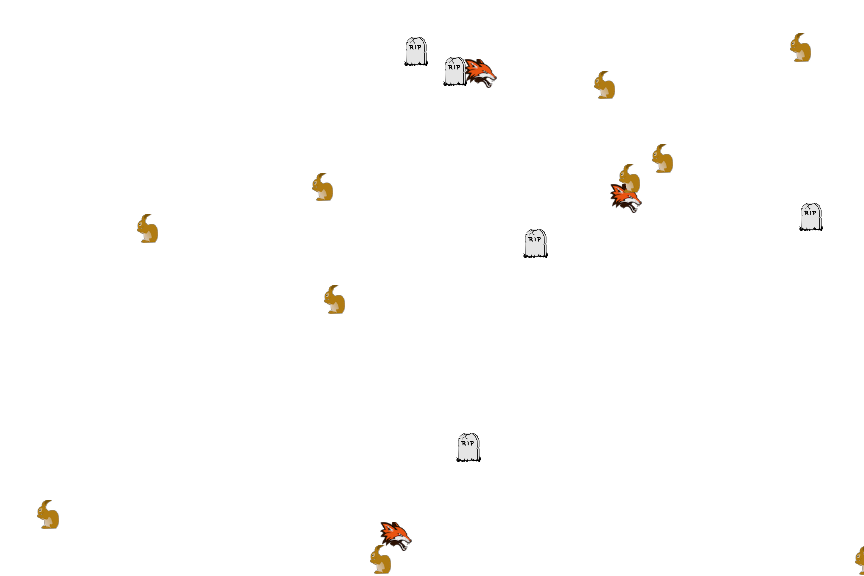
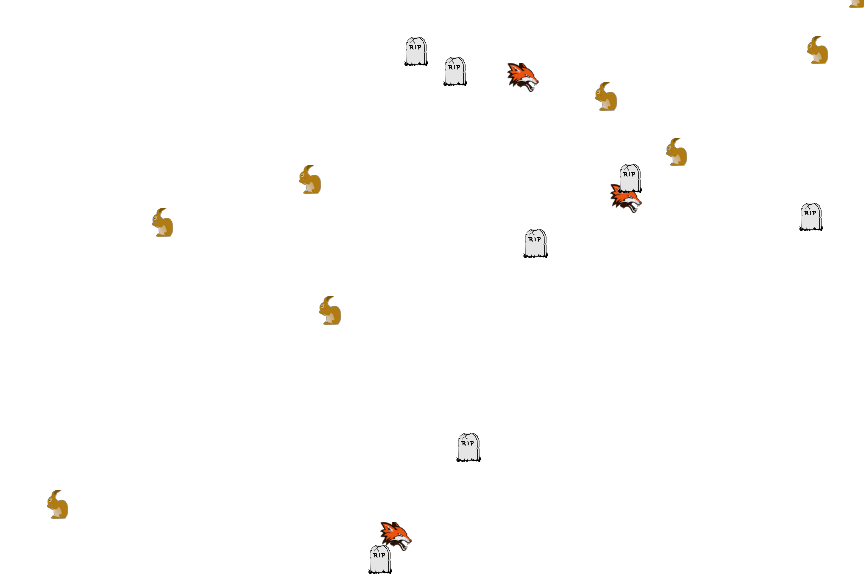
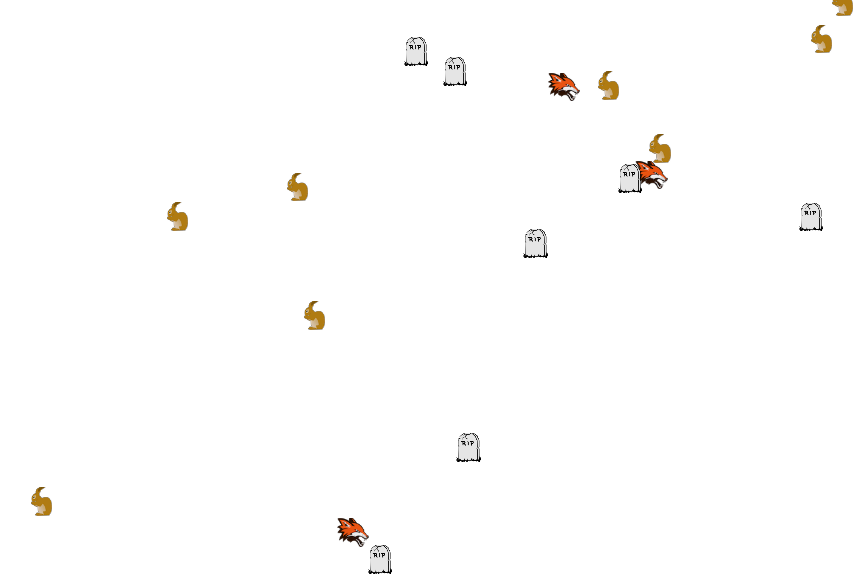
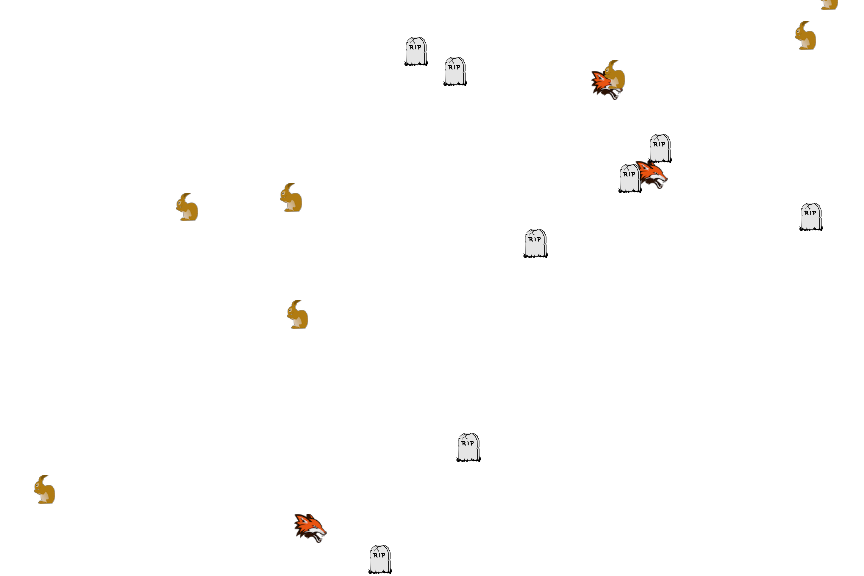
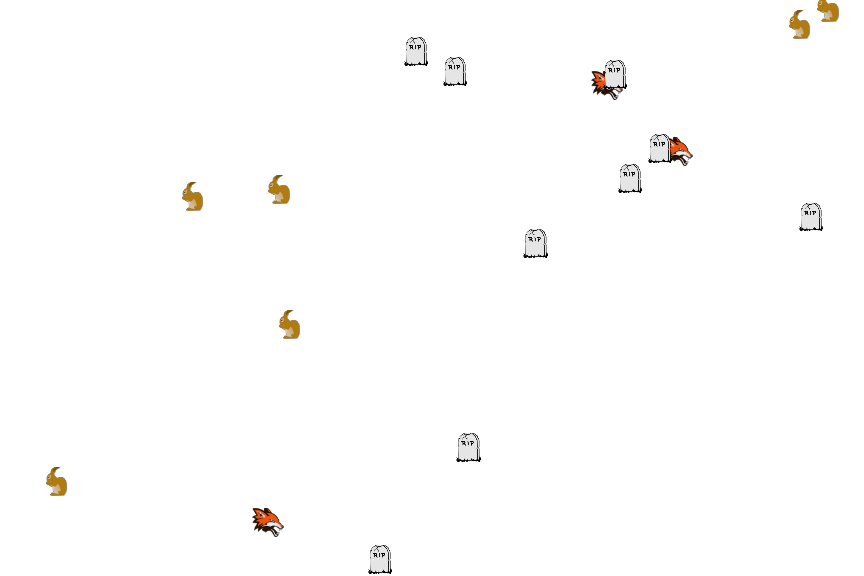
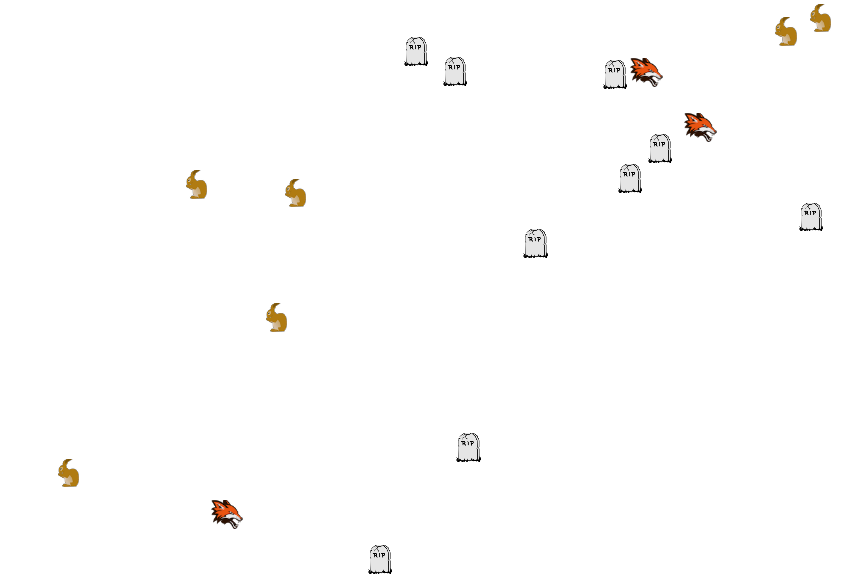
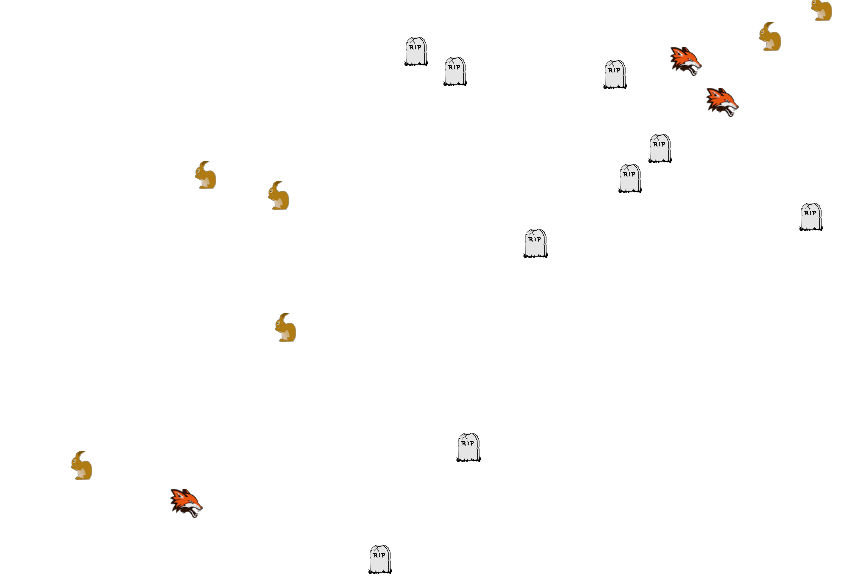
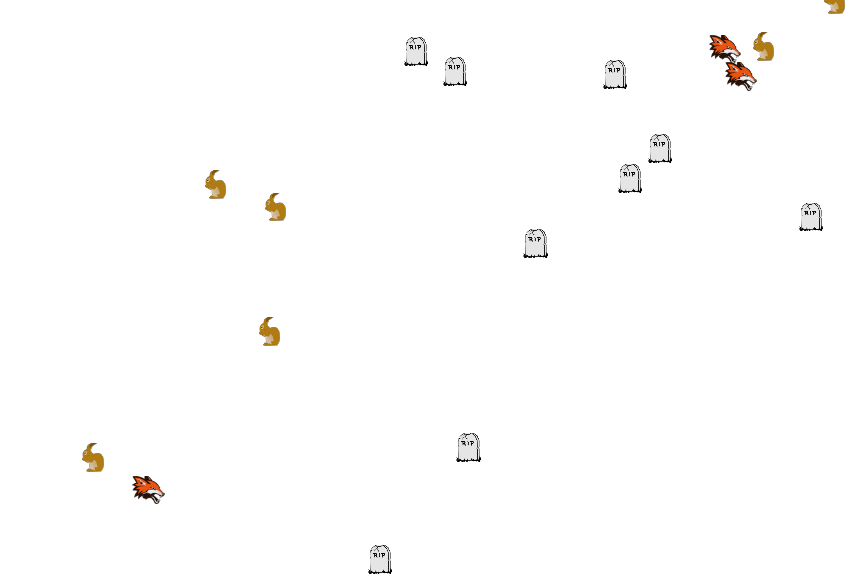
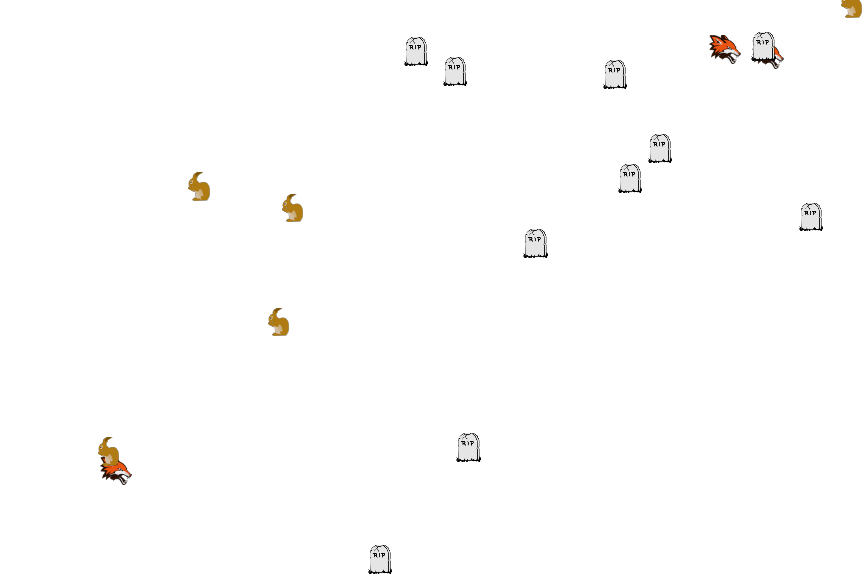
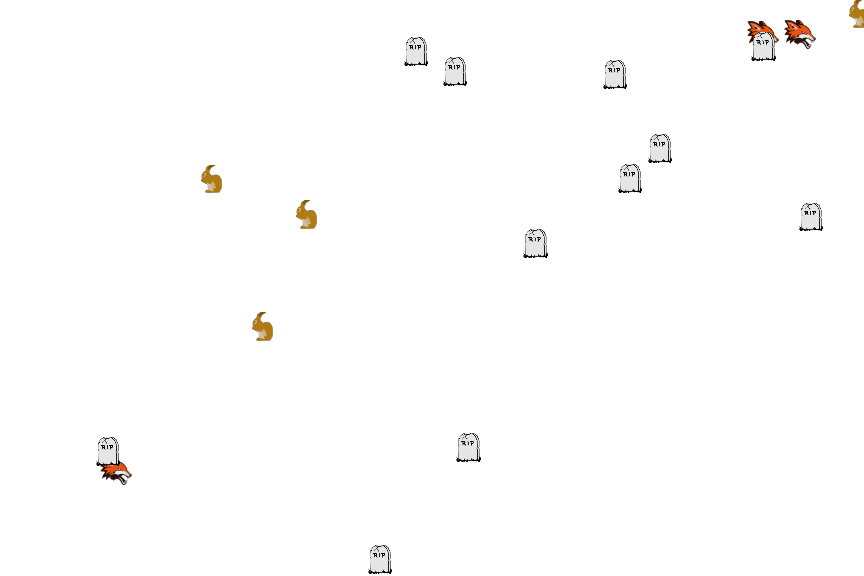
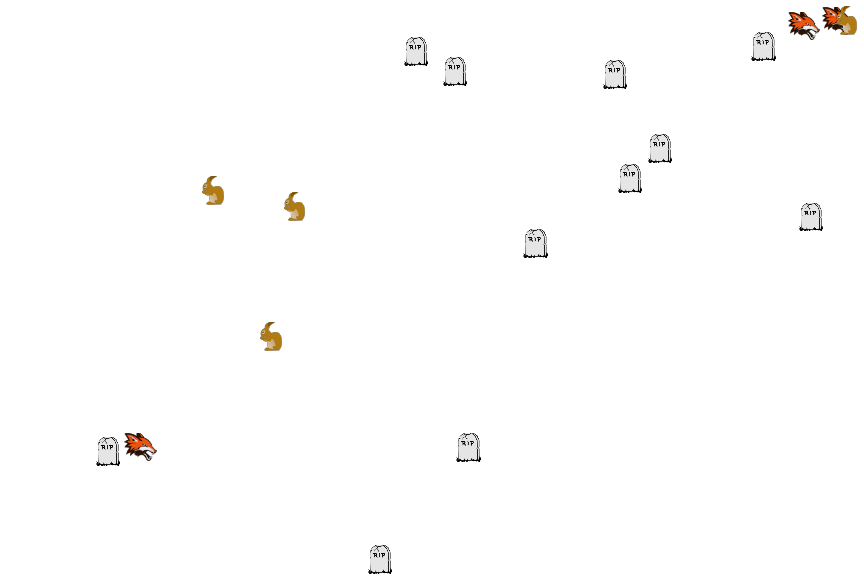
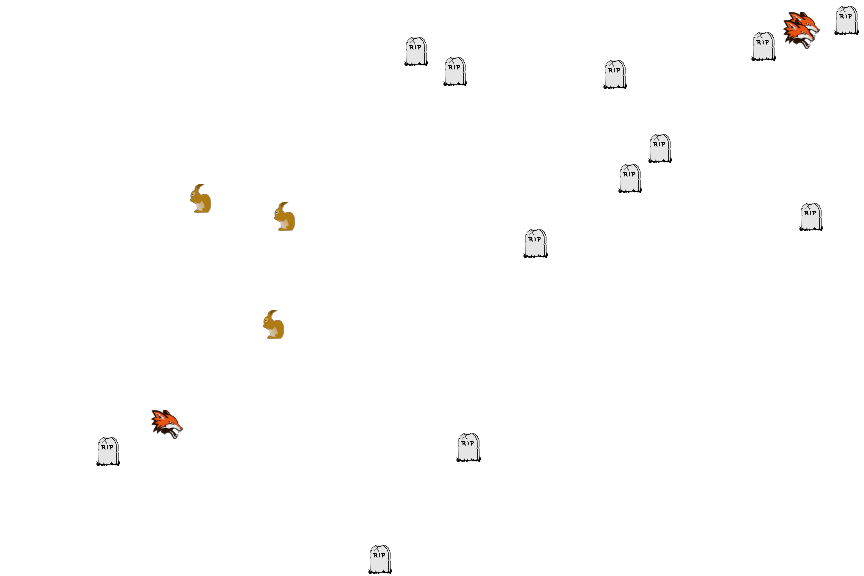
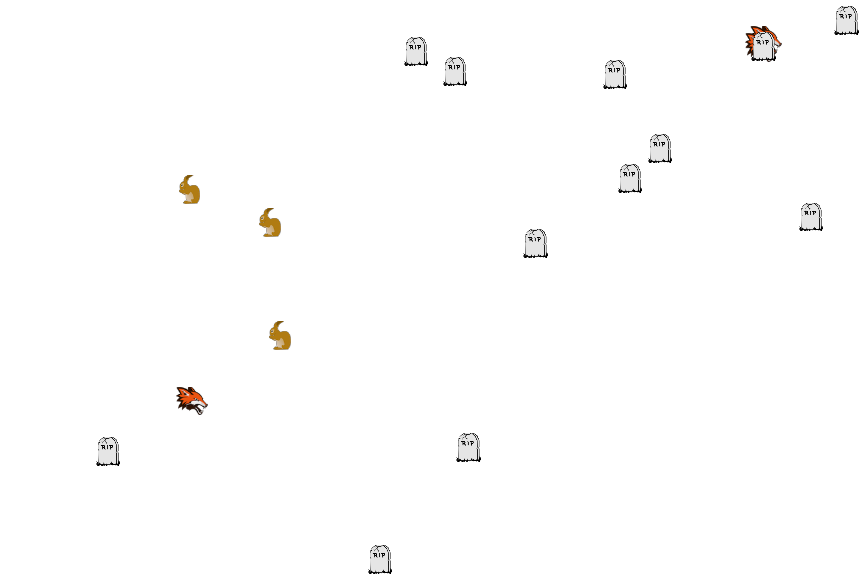
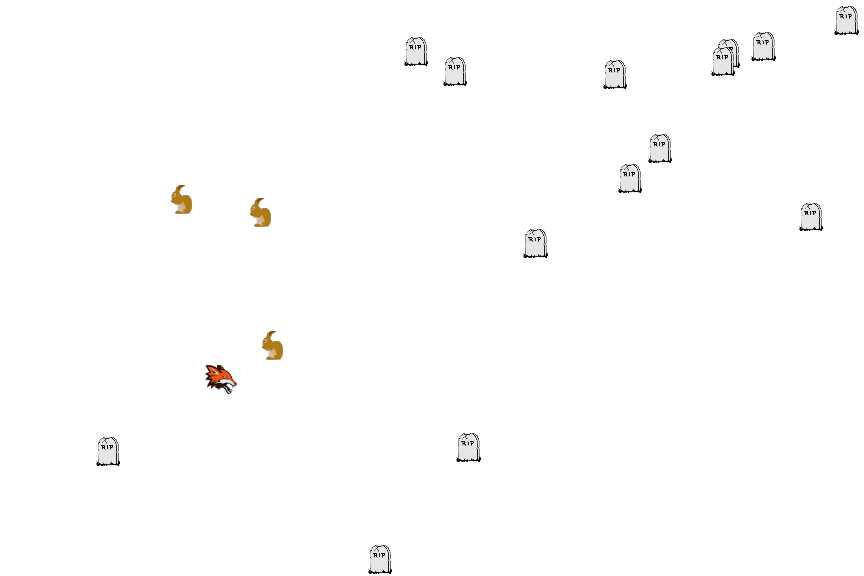
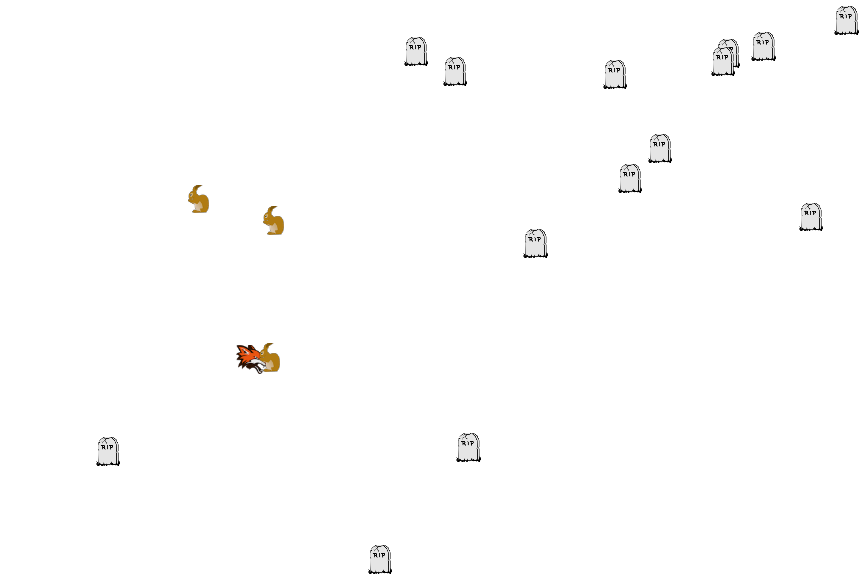
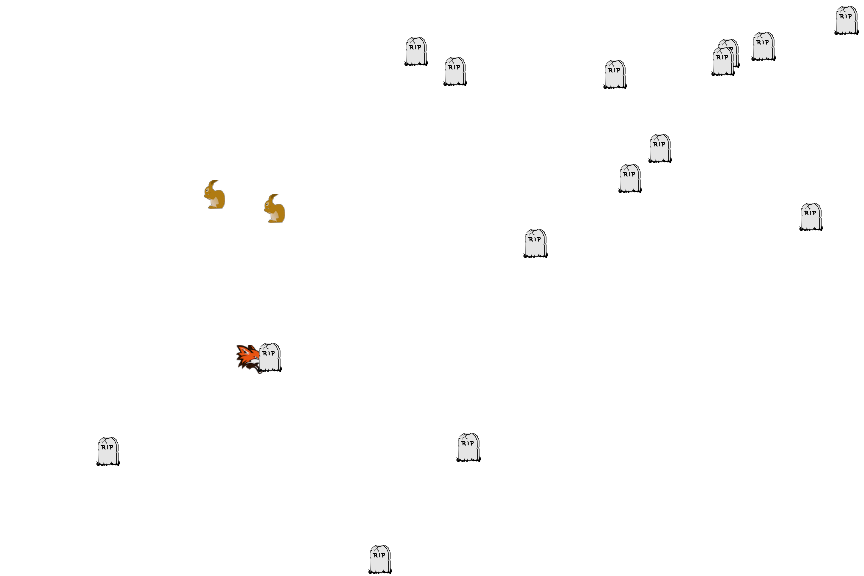
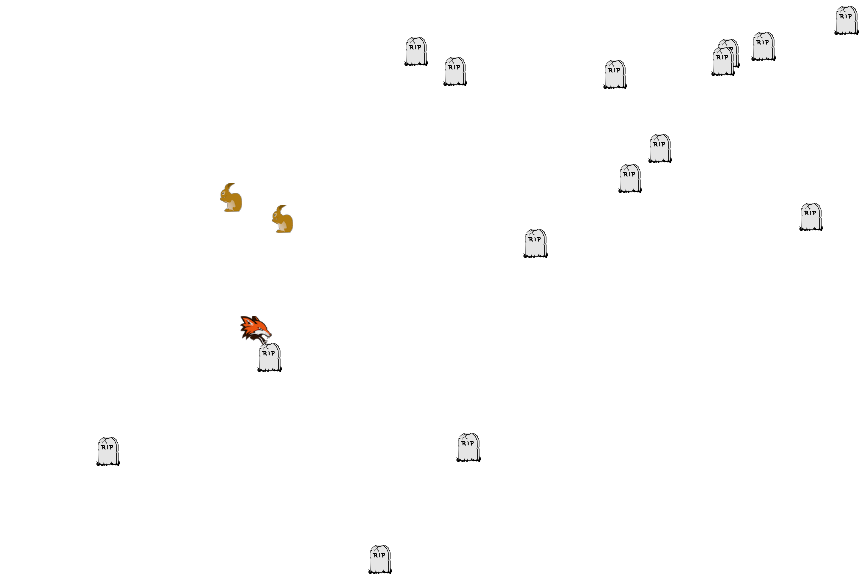
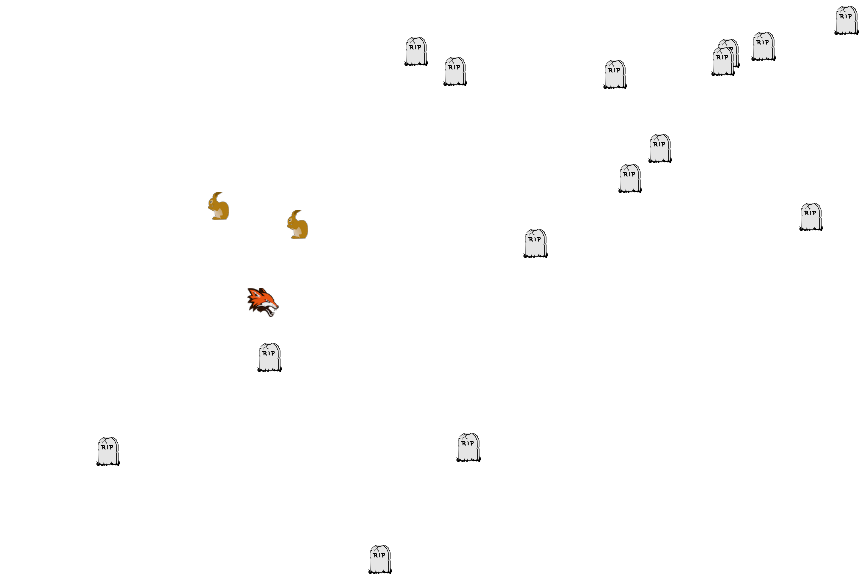
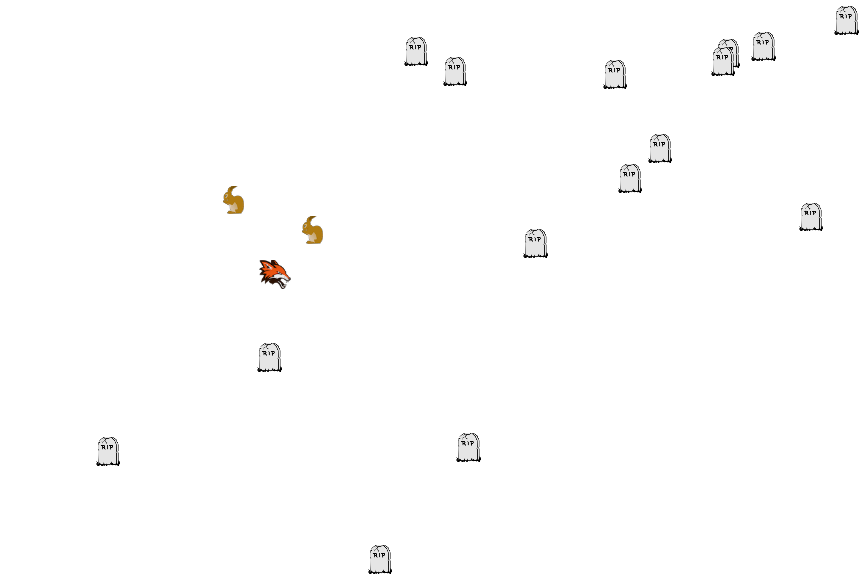
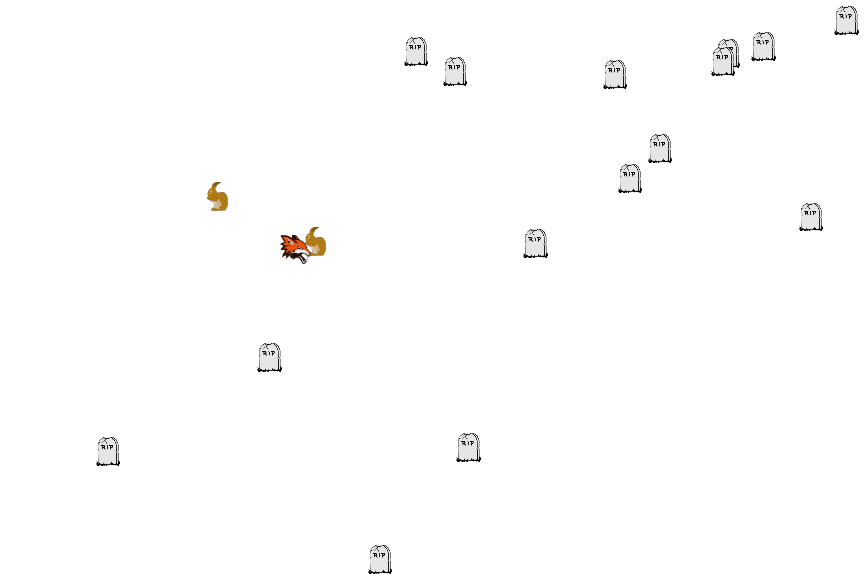
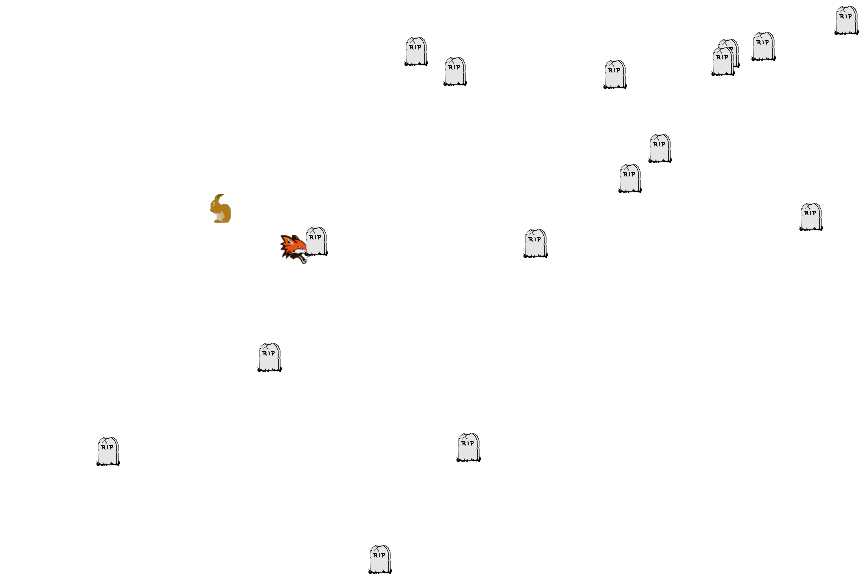
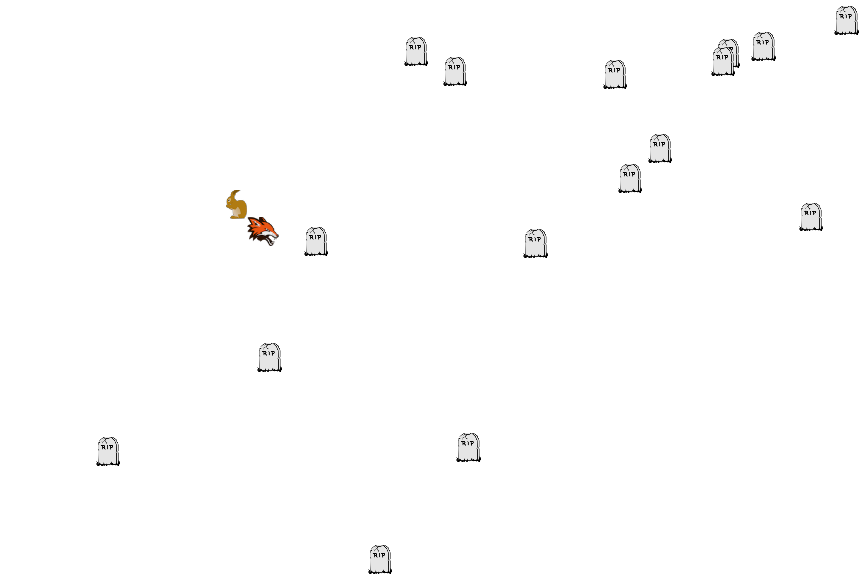
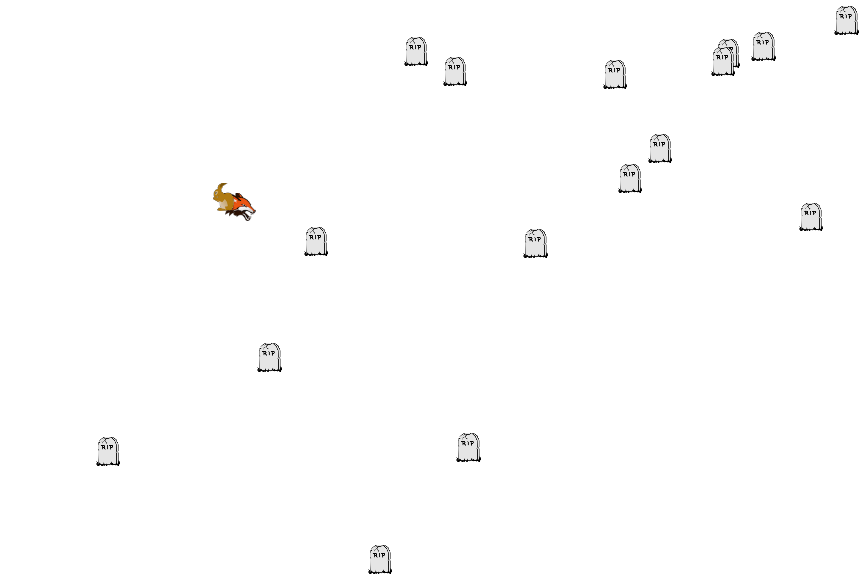
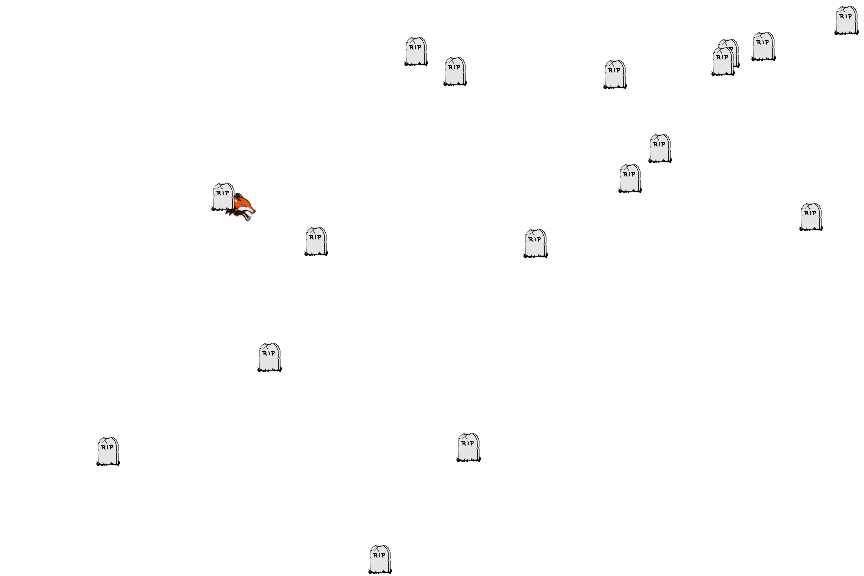
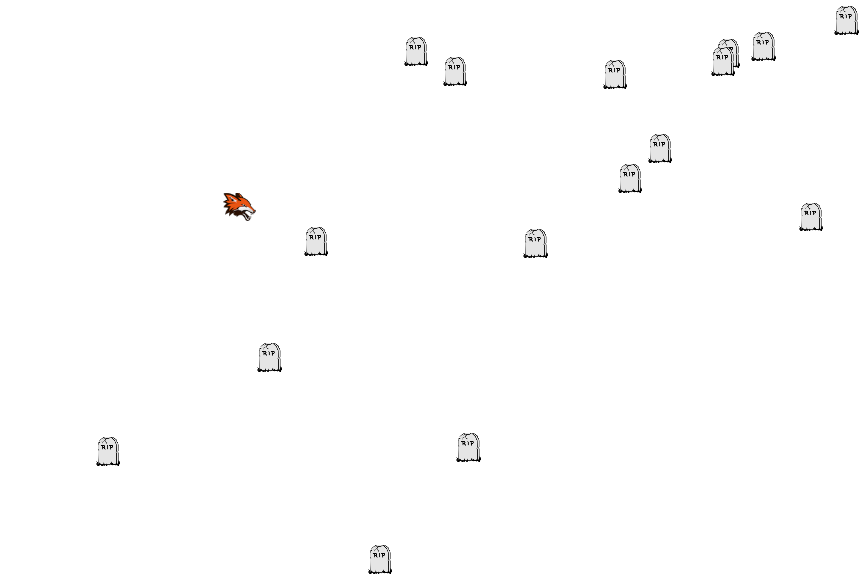
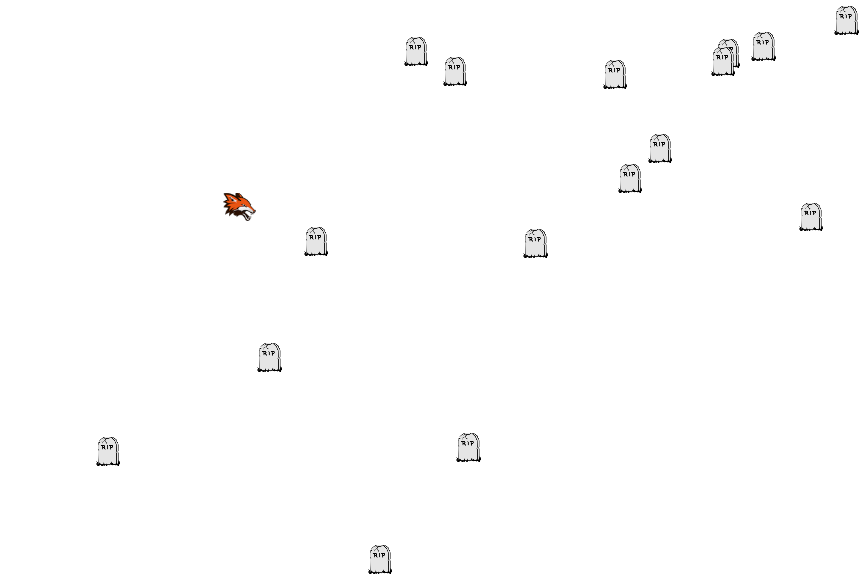
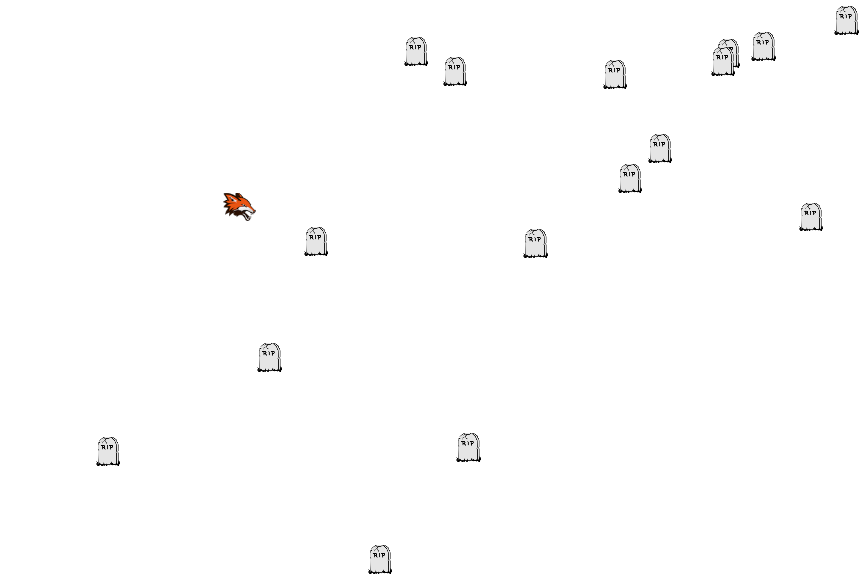
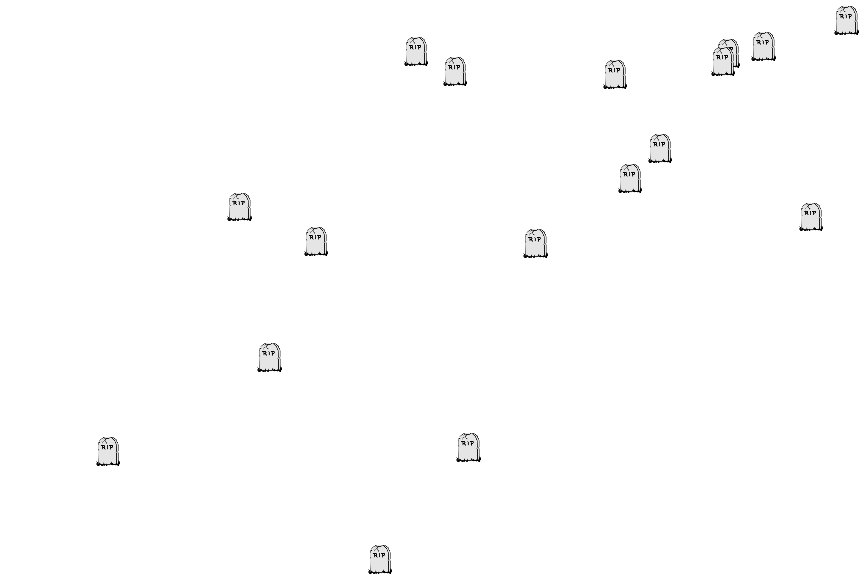
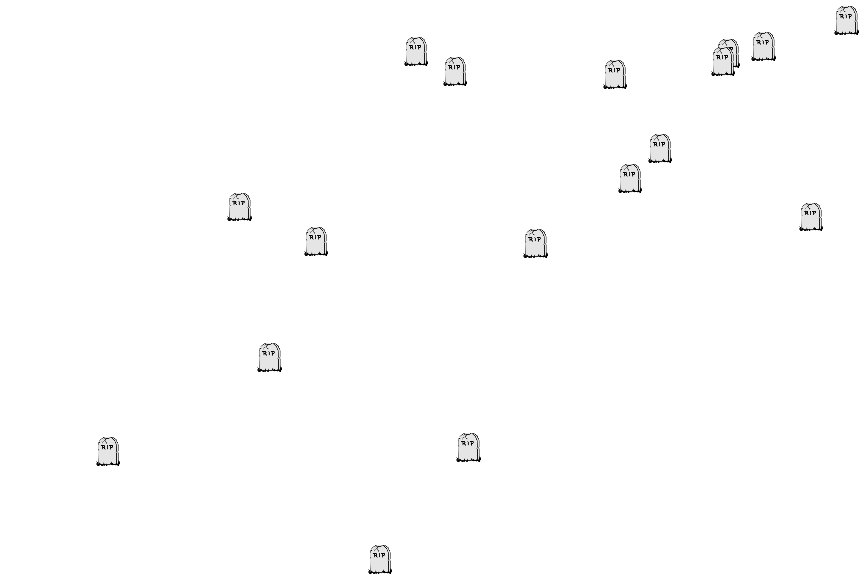
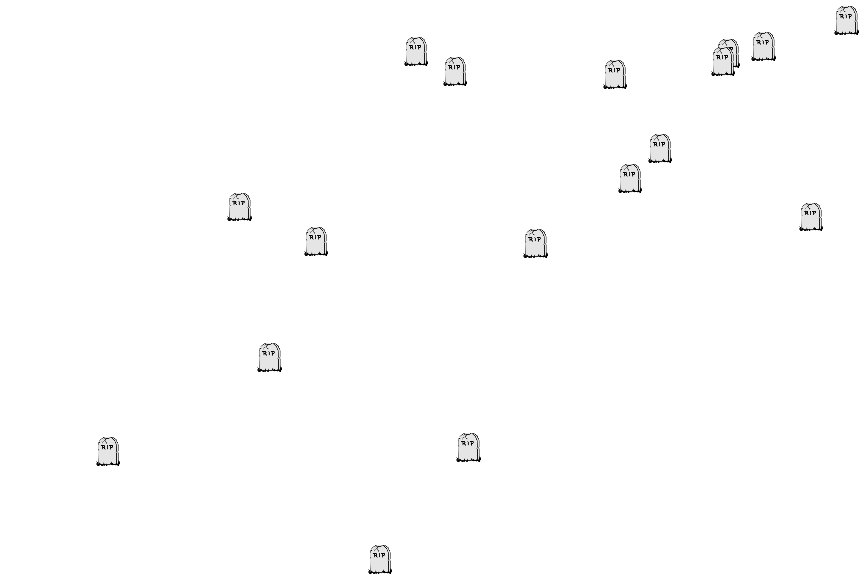
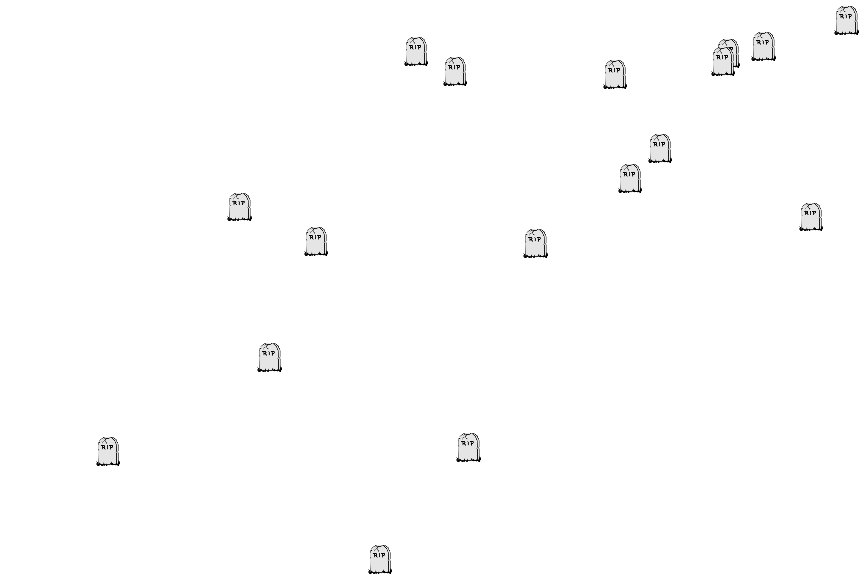
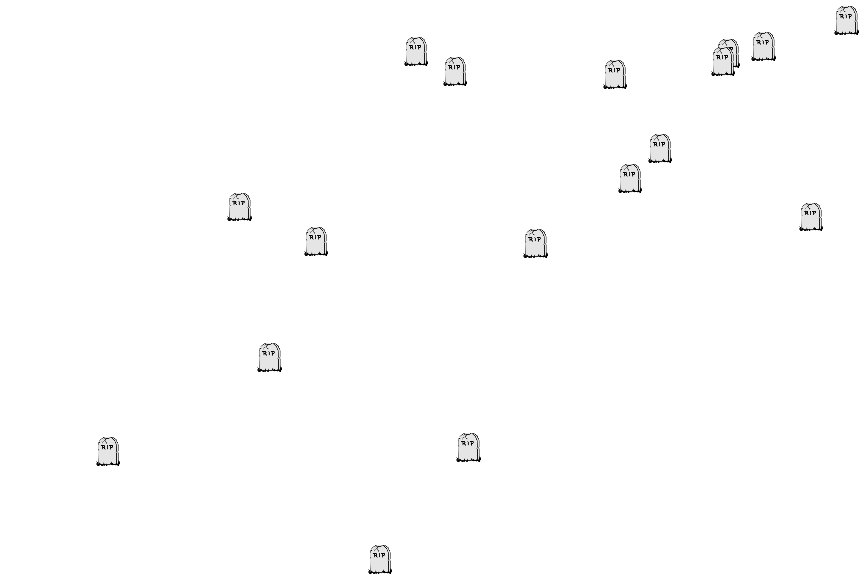
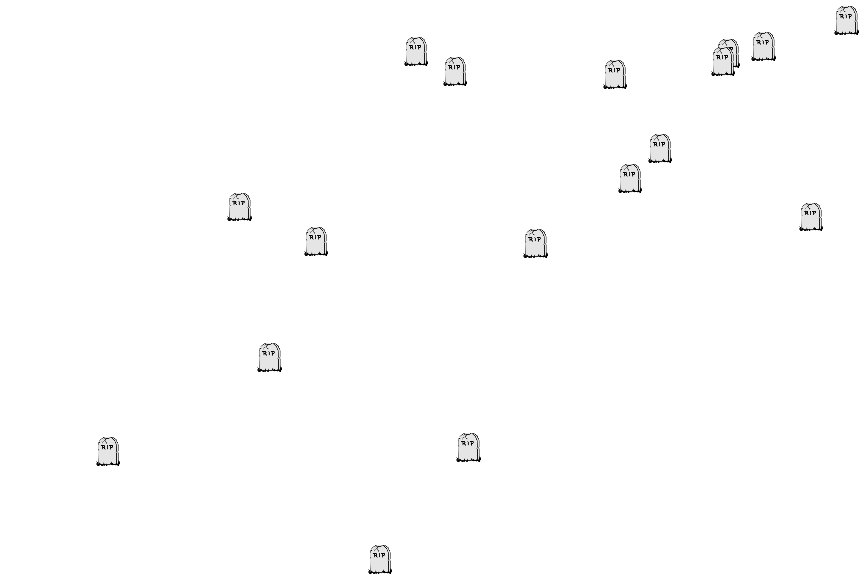
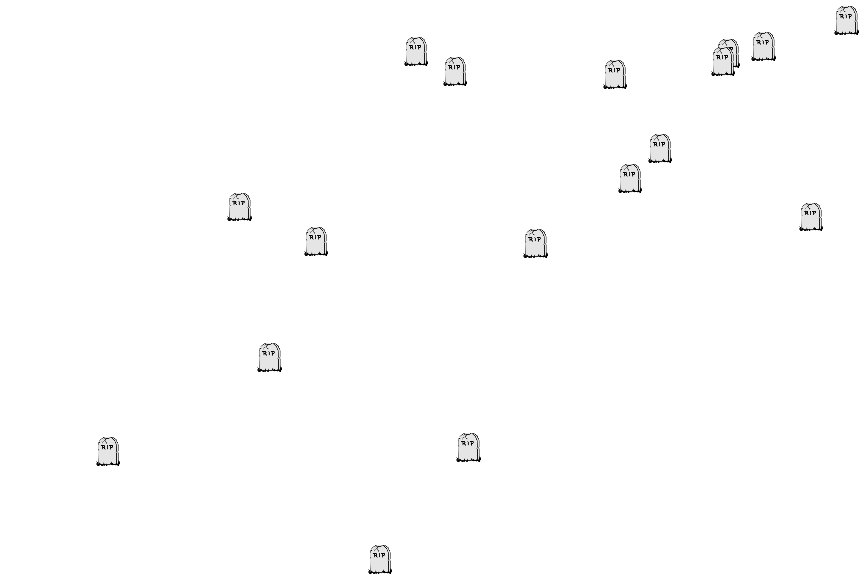
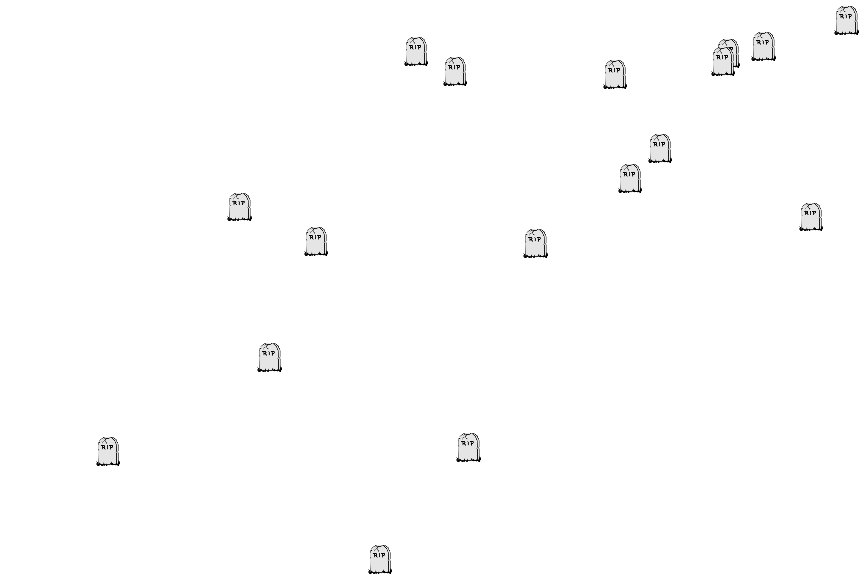
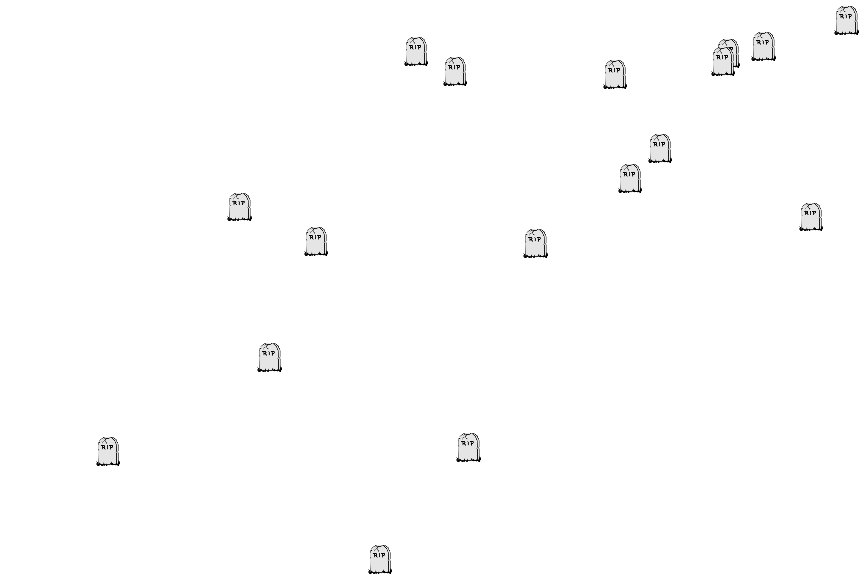
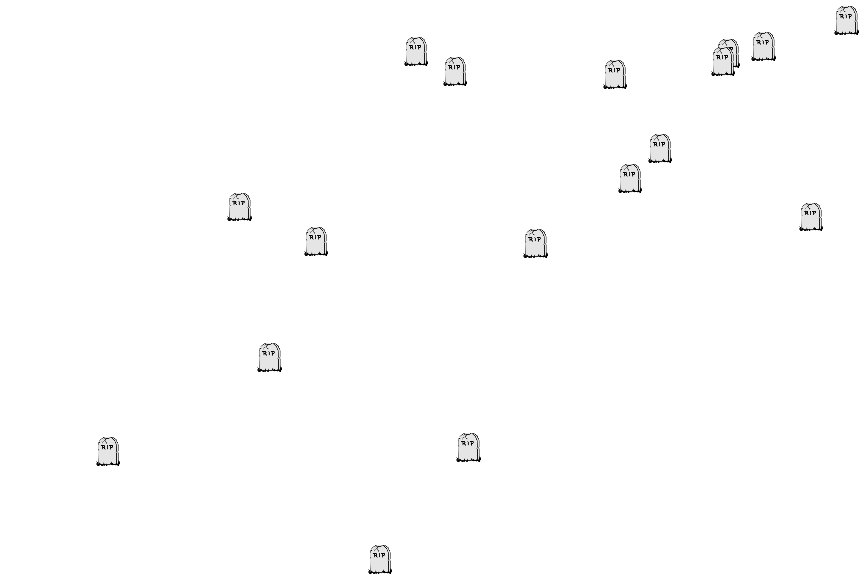
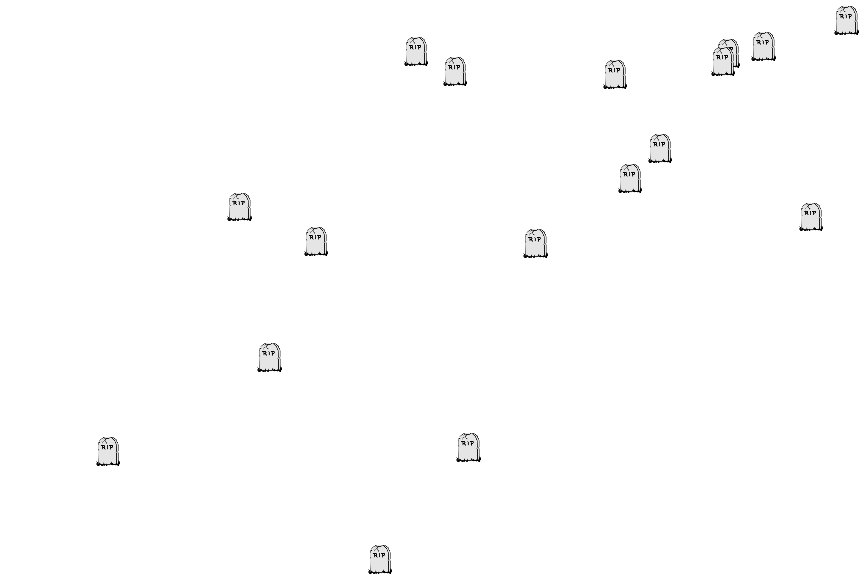
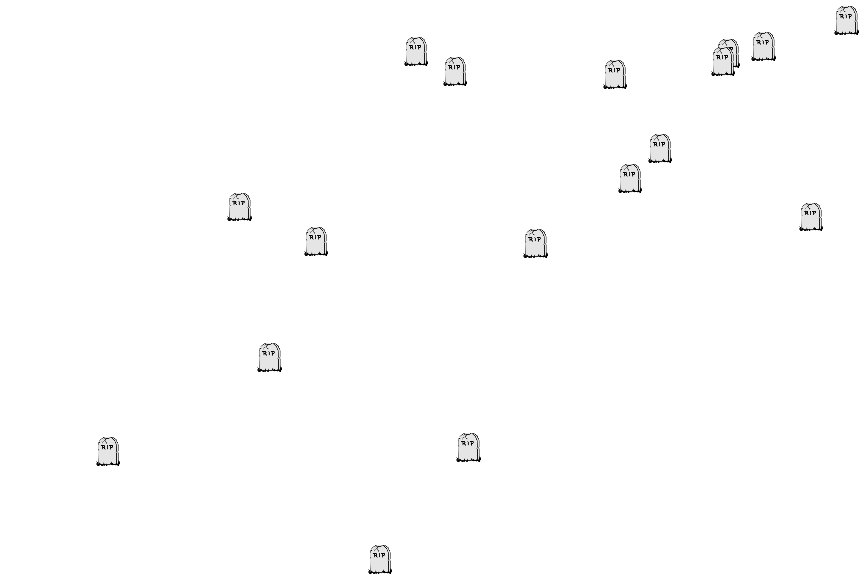
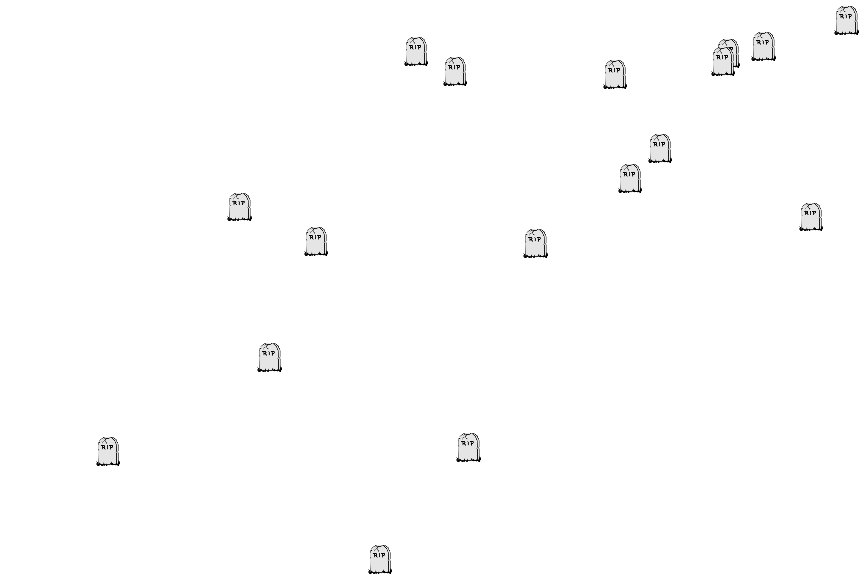
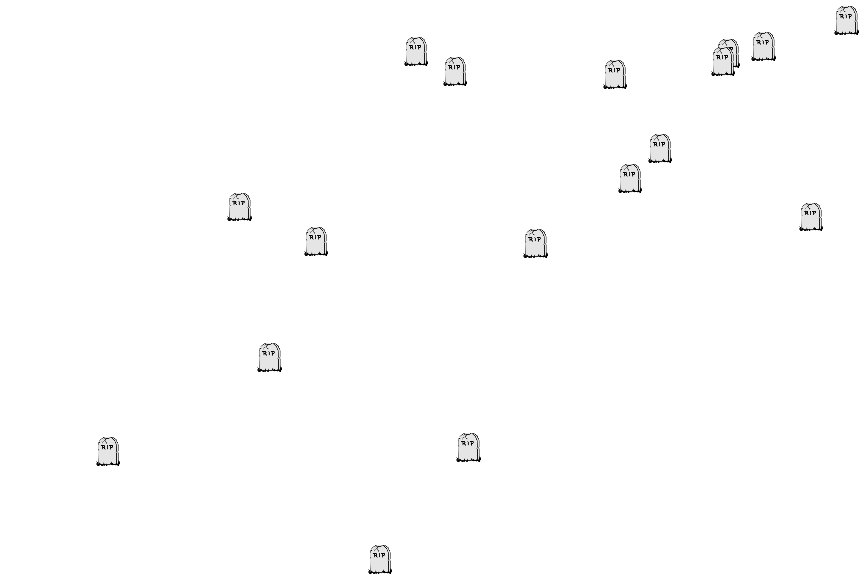
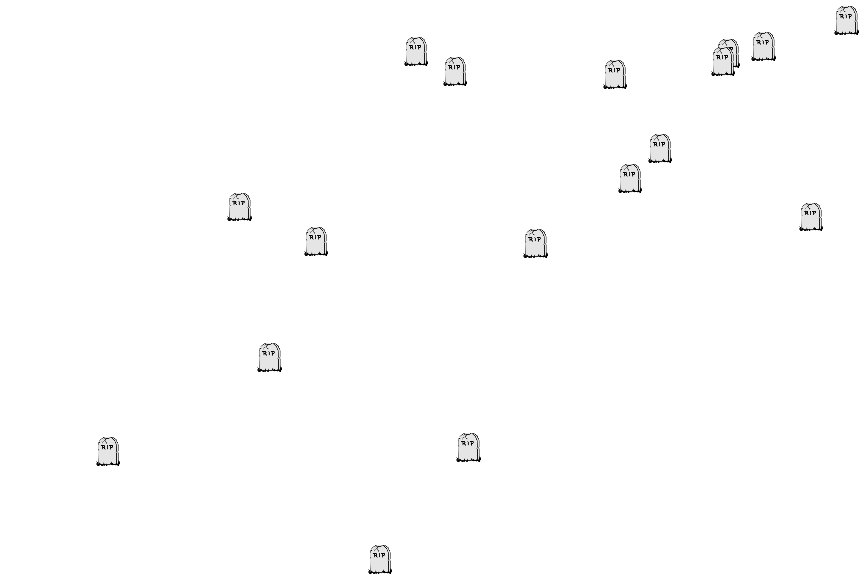
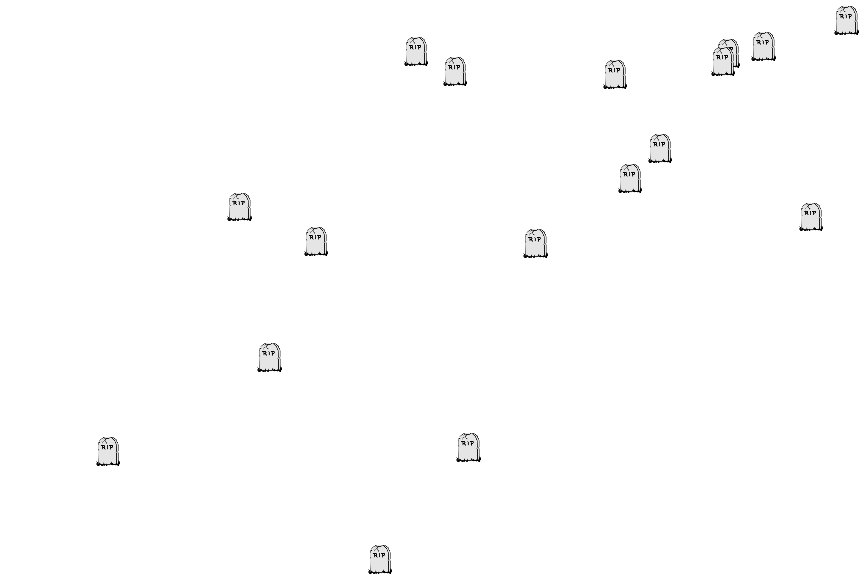
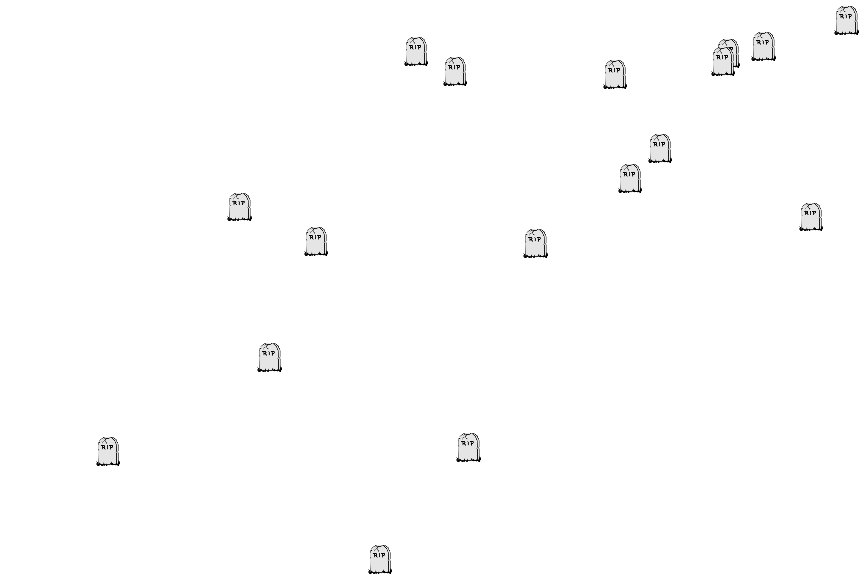
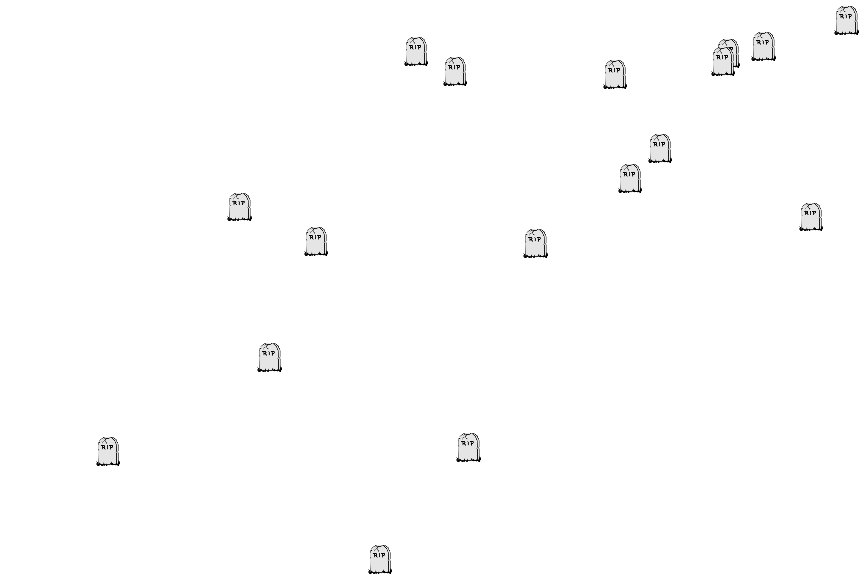

In [6]:
from JSAnimation import IPython_display
from matplotlib import animation

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.axis('off')

Nit = 51    # Iterate 1 more than the death of all foxes

foxes, rabbits = generate_predator_prey(Nr, Nf)


def init():
    fig.clf()

def update_predator_prey(i):
    """Updates the locations of all predators and preys in the inputs and
    displays them in input fig using the Agent.display method"""
    # Clear the figure first
    fig.clf()
    for fox in foxes:
        fox.move()
        fox.display(fig)
    for rabbit in rabbits:
        rabbit.move()
        rabbit.display(fig)

animation.FuncAnimation(fig, update_predator_prey, frames=Nit, interval=1, init_func=init)

**Extension: Create a generator of predator and prey instances using generator comprehension**